# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.184402e+01     8.161378e+00
 * time: 0.001981973648071289
     1     3.134032e+01     5.823379e+00
 * time: 0.008191108703613281
     2     2.275191e+01     7.461619e+00
 * time: 0.015393972396850586
     3     1.958740e+01     9.325947e+00
 * time: 0.022130966186523438
     4     1.450661e+01     4.918181e+00
 * time: 0.028994083404541016
     5     1.075846e+01     2.318174e+00
 * time: 0.03572702407836914
     6     9.756161e+00     1.890697e+00
 * time: 0.07232308387756348
     7     9.204203e+00     1.046790e+00
 * time: 0.07675814628601074
     8     8.895133e+00     8.109941e-01
 * time: 0.08115005493164062
     9     8.652192e+00     7.612936e-01
 * time: 0.08554601669311523
    10     8.441582e+00     6.359167e-01
 * time: 0.08983206748962402
    11     8.322380e+00     6.251482e-01
 * time: 0.09415292739868164
    12     8.242389e+00     4.736884e-01
 * time: 0.09892702102661133
    13     8.211963e+00     9.245857e-01
 * 

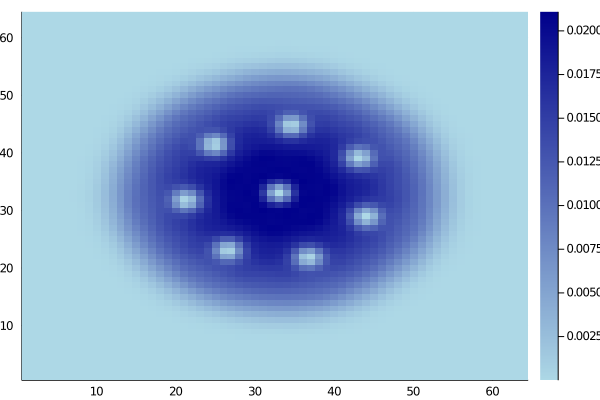

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)